# 1. Import necessary libraries

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# 2. Load Dataset

In [135]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Data Understanding / EDA

In [4]:
train_data.shape

(891, 12)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 891 entries, 0 to 890

Data columns (total 12 columns):

 #   Column       Non-Null Count  Dtype  

---  ------       --------------  -----  

 0   PassengerId  891 non-null    int64  

 1   Survived     891 non-null    int64  

 2   Pclass       891 non-null    int64  

 3   Name         891 non-null    object 

 4   Sex          891 non-null    object 

 5   Age          714 non-null    float64

 6   SibSp        891 non-null    int64  

 7   Parch        891 non-null    int64  

 8   Ticket       891 non-null    object 

 9   Fare         891 non-null    float64

 10  Cabin        204 non-null    object 

 11  Embarked     889 non-null    object 

dtypes: float64(2), int64(5), object(5)

memory usage: 83.7+ KB


In [7]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 4. Data Cleaning

In [13]:
train_data_2 = train_data.copy()
train_data_2.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [14]:
train_data_2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [16]:
train_data_2.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 5. Data Pre-processing

In [19]:
train_data_2['Age'].fillna(train_data_2['Age'].mean(),inplace=True)
train_data_2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


# EDA

<AxesSubplot:xlabel='Pclass', ylabel='count'>

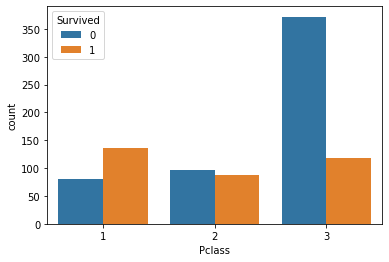

In [33]:
sns.countplot(data=train_data_2,x='Pclass',hue='Survived')

<AxesSubplot:xlabel='Sex', ylabel='count'>

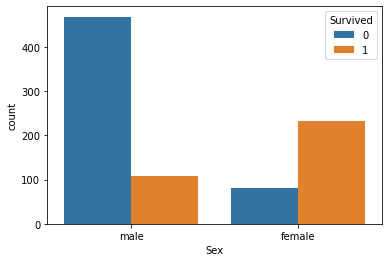

In [34]:
sns.countplot(data=train_data_2,x='Sex',hue='Survived')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

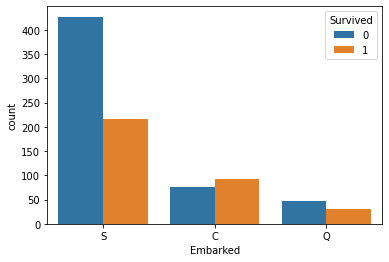

In [35]:
sns.countplot(data=train_data_2,x='Embarked',hue='Survived')

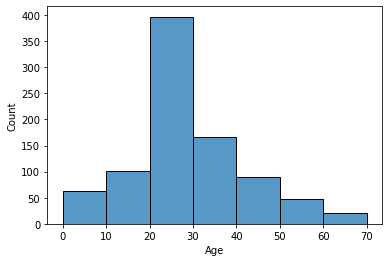

In [55]:
# plt.figure(figsize=(10,7))
sns.histplot(train_data_2['Age'],bins=list(range(0,80,10))) # bins=[0,10,20,30,40,50,60,70,80]
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

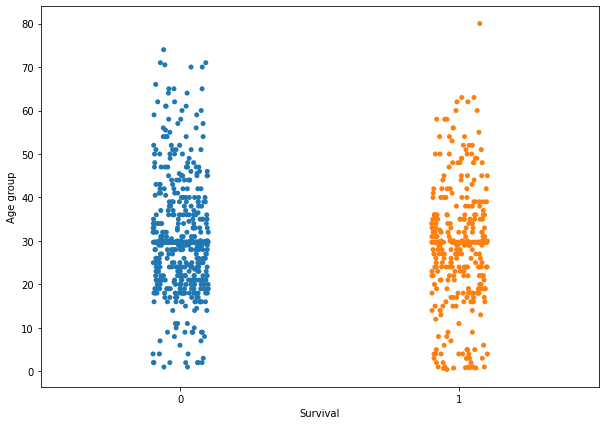

In [61]:
plt.figure(figsize=(10,7))
sns.stripplot(x='Survived',y='Age',data=train_data_2)
plt.ylabel('Age group')
plt.xlabel('Survival')
plt.show

# Data Pre-Processing -- continuation

In [57]:
le = LabelEncoder()
train_data_2['Sex'] = le.fit_transform(train_data_2['Sex'])
train_data_2['Embarked'] = le.fit_transform(train_data_2['Embarked'])
train_data_2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


# 6. Model Building

In [60]:
X=train_data_2.drop('Survived',axis=1)
y=train_data_2[['Survived']]

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

# 7. Model Training

In [66]:
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
lgb_model = LGBMClassifier()

In [67]:
dt_model.fit(X_train,y_train)
rf_model.fit(X_train,y_train)
lgb_model.fit(X_train,y_train)

LGBMClassifier()

# 8. Model Testing

In [68]:
y_pred_dt=dt_model.predict(X_test)
y_pred_rf=rf_model.predict(X_test)
y_pred_lgb=lgb_model.predict(X_test)

# 9. Model Evaluation

In [72]:
dt_model.score(X_test,y_test)

0.7653631284916201

In [75]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support



           0       0.86      0.76      0.81       117

           1       0.63      0.77      0.70        62



    accuracy                           0.77       179

   macro avg       0.75      0.77      0.75       179

weighted avg       0.78      0.77      0.77       179




In [80]:
print(confusion_matrix(y_test,y_pred_dt))

[[89 28]

 [14 48]]


In [73]:
rf_model.score(X_test,y_test)

0.8324022346368715

In [76]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support



           0       0.88      0.86      0.87       117

           1       0.75      0.77      0.76        62



    accuracy                           0.83       179

   macro avg       0.81      0.82      0.82       179

weighted avg       0.83      0.83      0.83       179




In [79]:
print(confusion_matrix(y_test,y_pred_rf))

[[101  16]

 [ 14  48]]


In [74]:
lgb_model.score(X_test,y_test)

0.8435754189944135

In [77]:
print(classification_report(y_test,y_pred_lgb))

              precision    recall  f1-score   support



           0       0.88      0.88      0.88       117

           1       0.77      0.77      0.77        62



    accuracy                           0.84       179

   macro avg       0.83      0.83      0.83       179

weighted avg       0.84      0.84      0.84       179




In [78]:
print(confusion_matrix(y_test,y_pred_lgb))

[[103  14]

 [ 14  48]]


In [83]:
type(y_pred_lgb)

numpy.ndarray

# 10. Model Prediction for test dataset

In [89]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [136]:
test_data_2 = test_data.copy()
test_data_2.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [137]:
test_data_2.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [138]:
test_data_2.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [139]:
test_data_2['Age'].fillna(test_data_2['Age'].mean(),inplace=True)

In [140]:
test_data_2.shape

(418, 8)

In [141]:
test_data_2['Sex'] = le.fit_transform(test_data_2['Sex'])
test_data_2['Embarked'] = le.fit_transform(test_data_2['Embarked'])
test_data_2.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


In [142]:
y_pred = lgb_model.predict(test_data_2.drop('PassengerId',axis=1))

In [143]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [144]:
pred_df = pd.DataFrame({'PassengerId':test_data_2['PassengerId'],'Survived':y_pred})

In [145]:
pred_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [146]:
pred_df.to_csv('survival_prediction.csv',index=False)